In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np
import calendar

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Inntekter fra bomstasjoner er blitt et stadig viktigere verktøy for å skape inntekter og redusere eksternaliteter. I Norge har inntektene fra bompenger økt fra 3 milliarder til 11 milliarder mellom 2005 til 2018, dette utgjør 18-19% av alle bilrelaterte skatter og avgifter (Sand et al., 2022). Bompenger spiller en viktig rolle i finansieringen av infrastruktur og regulering av trafikk. 

Analyser om hvilke effekter bompenger har på bilister kan være nyttig av flere årsaker. Samlet sett vil det bidra til mer kunnskapsbasert politikkutforming, bedre ressursallokering og mer effektive tiltak for å møte transportrelaterte utfordringer.

Hovedfokuset i denne oppgaven er å undersøke hvilken effekt bompenger har på bilister og trafikkbildet i Tromsø. For å gjennomføre analysen vil oppgaven benytte seg av mikroøkonomisk teori. Oppgaven er strukturert i fire kapitler: Kapittel 1 gir en innledning der oppgaven går kort inn på hvorfor bompenger er innført. Kapittel 2 gir en oversikt over trafikkbildet i Tromsø, både før og etter innføringen av bompenger. Kapittel 3 tar for seg hvordan bilister tilpasser seg bompenger, der oppgaven tar i bruk en Cobb-Douglas modell. Kapittel 4 er et kort sammendrag som oppsummerer funnene i analysen.


##### Kort om bomstasjonene

Bomstasjonene i Tromsø ble satt i drift fra og med 5. Januar. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken "Tenk Tromsø". Bidraget utgjør ca. 58% av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside opplyses det om at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport.  

"Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle" (Tenk Tromsø, u.å.) 

Det er totalt installert 15 bomstasjoner i Tromsø. Disse er strategisk plassert for å fange opp de mest trafikkerte rutene i byområdet. Målet er å sikre at så mange som mulig bidrar til å betale for bompasseringene. Bilister kan bruke AutoPASS-systemet, som sikrer automatisk registrering av passeringer og korrekt rabatt. Når man bestiller en AutoPASS-avtale, mottar man en brikke som skal festes på innsiden av bilens frontrute. Hvis man ikke har en slik brikke, må man betale full pris for hver passering. Flere selskaper tilbyr AutoPASS, men rabatten er den samme uavhengig av hvilket selskap man inngår avtale med. Alle med en gyldig avtale mottar en 20% rabatt, mens elbiler med avtale får ytterligere 50% rabatt. Bompengeselskapet Nord er ansvarlig for innsamling av bompenger i Tromsø. Alle bomstasjoner har toveis innkreving, noe som betyr at man betaler bompenger i begge retninger. Man betaler kun for én passering per time, selv om man kjører gjennom flere bomstasjoner. Timebegrensningen gjelder bare for de som har en AutoPASS-avtale. Det er også en månedlig takgrense som begrenser betalingen til maksimalt 80 passeringer. Denne takgrensen gjelder for alle kalendermåneder, men kun for de med en AutoPASS-avtale. I rushtiden er det dobbel takst, som gjelder mandag til fredag mellom kl. 06:30 og 09:00 samt kl. 15:00 og 17:00. Rushtidsavgiften gjelder ikke på helligdager og offisielle fridager (Tenk Tromsø u.å.).

In [3]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


In [4]:
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


For oversiktens skyld viser tabellene over takstene for bompasseringer for fossil- og elbiler, som inkluderer både for de med AUTO-pass avtale og de uten. Oppgaven vil se på en gjennomsnittsberegning som ser på effektene samlet sett. 

### Kapittel 2. Trafikkbildet i Tromsø før og etter bompenger.

In [5]:
månedstrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/m%C3%A5nedstrafikk.csv', sep=';')
månedstrafikk = månedstrafikk.loc[(månedstrafikk.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 
månedstrafikk = månedstrafikk.rename(columns={'År':'YEAR','Måned' : 'MONTH', 'TROMSØBRUA': 'Tromsø Brua'})
månedstrafikk['Dato'] = pd.to_datetime(månedstrafikk[['YEAR', 'MONTH']].assign(DAY=1))
månedstrafikk.drop(['YEAR','MONTH'], inplace= True, axis = 1)
månedstrafikk['Dato']= pd.to_datetime(månedstrafikk['Dato'])

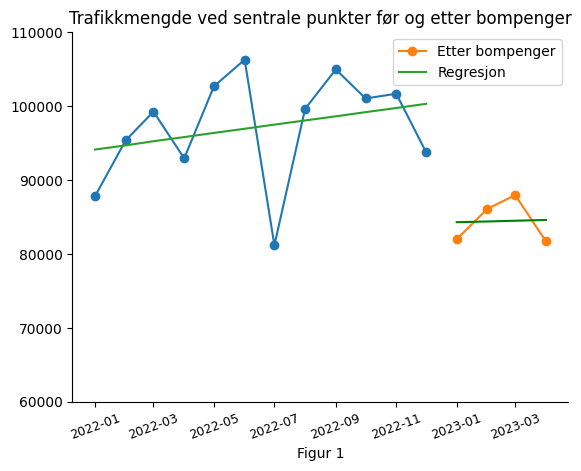

In [6]:
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  #  Fjerner false-postive warning. 

månedstrafikksum = månedstrafikk.groupby(['Dato'])['Trafikkmengde'].sum()
månedstrafikksum = månedstrafikksum.to_frame()
månedstrafikksum = månedstrafikksum.reset_index()
månedstrafikk2022 = månedstrafikksum[månedstrafikksum['Dato'] < '2023-01-01']
månedstrafikk2023 = månedstrafikksum[månedstrafikksum['Dato'] >= '2023-01-01']

# lager regresjon av verdier før bompenger
månedstrafikk2022['Time'] = np.arange(len(månedstrafikk2022.index))
X = månedstrafikk2022.loc[:, ['Time']] 
y = månedstrafikk2022.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

# lager regresjon av verdier etter bompenger
månedstrafikk2023['Time'] = np.arange(len(månedstrafikk2023.index))
X2 = månedstrafikk2023.loc[:, ['Time']] 
y2 = månedstrafikk2023.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X2, y2)
y_pred2 = pd.Series(model.predict(X2), index=X2.index)

# plotter
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_ylim(60000,110000)
ax.set_title('Trafikkmengde ved sentrale punkter før og etter bompenger')

ax.plot(månedstrafikk2022['Dato'],månedstrafikk2022['Trafikkmengde'], marker = 'o')
ax.plot(månedstrafikk2023['Dato'],månedstrafikk2023['Trafikkmengde'], marker = 'o', label = 'Etter bompenger')
ax.plot(månedstrafikk2022['Dato'],y_pred, label = 'Regresjon')
ax.plot(månedstrafikk2023['Dato'],y_pred2, color =  'green')

ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(loc= 'best');

Figur 1 viser trafikkmengden ved forskjellige steder i Tromsø. Punktene som er inkludert i figuren er: Breivika, Tverforbindelsen, Tromsø brua, Sandnessundbrua, Kvaløyvegen og Giæverbukta. Punktene er jevnt fordelt over Tromsø-øya, og gir et godt bilde av trafikken.

Vi observerer at trafikkmengden etter 2023 er lavere sammenlignet med 2022. De grønne linjene representerer to regresjoner, en for 2022 og en for 2023. Regresjonslinjene viser tydelig at trafikkmengden er redusert. For 2022 ser vi en økende trend, mens for 2023 er regresjonslinjen tilnærmet flat. 


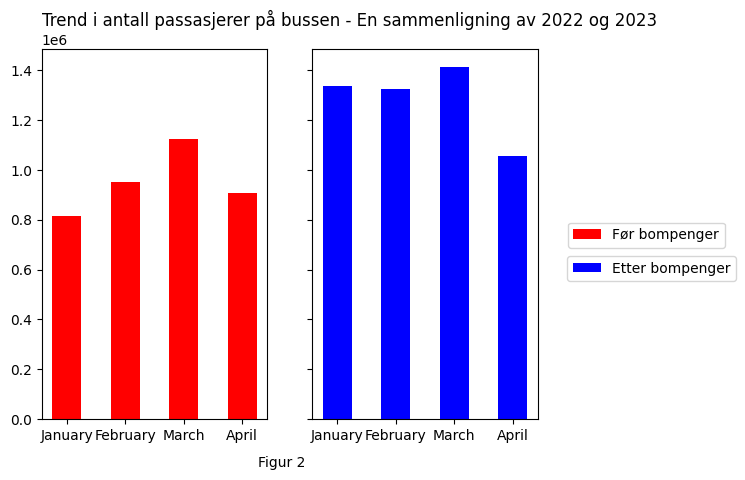

In [7]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)
df_buss2022 = df_buss[(df_buss['date'] >= '2022-01-01') & (df_buss['date'] <= '2022-04-30')]
df_buss2022 = df_buss2022.groupby(['date'])['Påstigende'].sum() 
df_buss2022 = df_buss2022.to_frame()
df_buss2022 = df_buss2022.reset_index()

# før bompenger
df_måned = df_buss2022.groupby(df_buss2022['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned = df_måned.to_frame()
df_måned = df_måned.reset_index()
df_måned['Påstigende'] = df_måned['Påstigende']
months = ["January","February","March","April"]
df_måned['date'] = pd.Categorical(df_måned['date'], categories= months, ordered=True)
df_måned.sort_values(by='date', inplace=True)

# etter bompenger
df_buss2 = df_buss[(df_buss['date'] >= '2023-01-01') & (df_buss['date'] <= '2023-04-30')]
df_måned2 = df_buss2.groupby(df_buss2['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned2 = df_måned2.to_frame()
df_måned2 = df_måned2.reset_index()
df_måned2['Påstigende'] = df_måned2['Påstigende']
months2 = ["January", "February", "March", "April"]
df_måned2['date'] = pd.Categorical(df_måned2['date'], categories= months2, ordered=True)
df_måned2.sort_values(by='date', inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_måned['date'],df_måned["Påstigende"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_måned2['date'],df_måned2["Påstigende"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Trend i antall passasjerer på bussen - En sammenligning av 2022 og 2023', loc = 'left')
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46))
txt = 'Figur 2'
fig.text(.5, .01, txt, ha='center');

Kollektiv transport er et alternativ for bilister, og kan brukes som substitutt. Derfor kan man forvente at etterspørselen etter den ene øker dersom prisen på den andre går opp. Figur 2 viser antall påstigende på bussen før og etter innføringen av bompenger. Verdiene er delt på 1 million, slik at 0.8 tilsvarer 800 000. 

Vi kan observere at antall påstigende har økt ifra 2022 til 2023. I januar 2023 økte antallet med nesten 64% noe som er en betydelig økning fra året før. Trenden fortsetter de neste månedene, der antall påstigende er høyere enn tilsvarende måneder fra året før. 

Observasjonene kan indikere at en økning i prisen på kjøring har en innvirkning på bilisters atferd, med kollektivtransport som det mest åpenbare alternativet til kjøring. Det vil være interessant å overvåke utviklingen av antall passasjerer på buss i fremover, da langtidsvirkningen kan avvike fra det som er observert fram til april 2023.


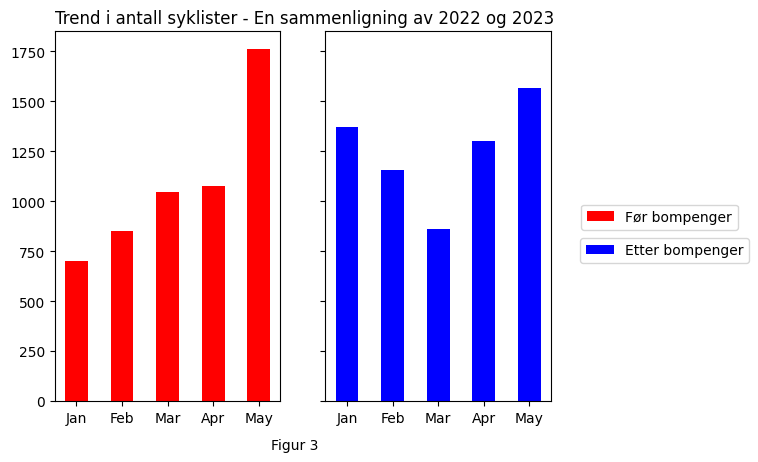

In [8]:
df_sykkel = pd.read_csv("https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/sykkeltrafikk.csv", dayfirst=True, sep=';')
df_sykkel = df_sykkel.loc[(df_sykkel.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 

# før bompenger
sykkel2022 = df_sykkel[df_sykkel.År == 2022]
sykkel2022 = sykkel2022[(sykkel2022['Måned'] >=  1) & (sykkel2022['Måned'] <=  5)]
sykkel2022_måned = sykkel2022.groupby(sykkel2022['Måned'])['Trafikkmengde'].sum()
df_sykkel2022_måned = sykkel2022_måned.to_frame()
df_sykkel2022_måned = df_sykkel2022_måned.reset_index()
df_sykkel2022_måned['Måned'] = df_sykkel2022_måned['Måned'].apply(lambda x: calendar.month_abbr[x])

# etter bompenger
sykkel2023 = df_sykkel[df_sykkel.År == 2023]
sykkel2023 = sykkel2023[(sykkel2023['Måned'] >=  1) & (sykkel2023['Måned'] <=  5)]
sykkel2023_måned = sykkel2023.groupby(sykkel2023['Måned'])['Trafikkmengde'].sum()
df_sykkel2023_måned = sykkel2023_måned.to_frame()
df_sykkel2023_måned = df_sykkel2023_måned.reset_index()
df_sykkel2023_måned['Måned'] = df_sykkel2023_måned['Måned'].apply(lambda x: calendar.month_abbr[x])


fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_sykkel2022_måned['Måned'],df_sykkel2022_måned["Trafikkmengde"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_sykkel2023_måned['Måned'],df_sykkel2023_måned["Trafikkmengde"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Trend i antall syklister - En sammenligning av 2022 og 2023', loc = 'left')
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46))
txt = 'Figur 3'
fig.text(.5, .01, txt, ha='center');

Bilister har flere alternativer enn bare kollektiv transport. Sykling er også blitt et populært transportmiddel. På samme måte som med kollektivtransport, kan man forvente at etterspørselen etter sykling øker dersom prisen på personbiltransport øker.

Figur 3 viser antall syklister før og etter innføringen av bompenger. I likhet med figur 1 er det valgt ut forskjellige punkter i Tromsø. Punktene er jevnt fordelt over Tromsø øya og gir et godt bilde av sykkel trafikken. Observasjonene viser en økning i antall syklister fra 2022 til 2023, med unntak av januar og mars. Dette kan skyldes andre forhold slik som et bedre klima for sykling, for eksempel tidligere sommer. 

Funnene som illustreres i figur 2 og 3 viser betydningen av buss og sykling som en løsning for transportbehov, og viser en økende trend i valg av buss og sykkel som et alternativ til personbil transport. På den andre siden er det vanskelig å fastslå en helt sikker årsakssammenheng, da det kan være flere faktorer som påvirker resultatene.

### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom andre goder og antall kilometer kjørt. Begge valgmulighetene er blitt omgjort til kroner, slik at det blir et mål i penger. Andre goder er blitt gitt prisen 1, mens antall kilometer kjørt er regnet om til pris per kilometer kjøring. 

##### Budsjettbetingelse 

Gitt at hele innteken brukes på konsum må høyre siden være lik venstre siden. Budsjettbetingelsen formuleres dermed slik: 

\begin{equation}
   p_1x_1 + p_2x_2 = m \tag{1}
\end{equation}

For å tegne en budsjettlinje trenger vi et budsjett. Ifølge Statistisk sentralbyrå (SSB) var gjennomsnittsinntekten i 2022, 644 680 kroner. Vi kan regne om og bruke dette som et estimat for konsumentems daglige budsjett. Vi trenger også prisen på gode 1 og gode 2. Transportøkonomisk institutt (TØI) har funnet at kostnadene per kilometer for 2022 i gjennomsnitt var 3,03 kroner. Modellen vil benytte dette estimatet for kostnaden per kilometer før innføringen av bompenger. Vi trenger også kostnaden som påføres bilistene etter innføringen av bompenger. I en artikkel fra Nordlys (26. april 2023) har vi fått ferske tall fra Tenk Tromsø. De opplyser at en gjennomsnittlig bilist i Tromsø brukte 366 kroner på bompenger i mars. Vi kan bruke dette tallet til å beregne kostnaden dette utgjør per kilometer ved å først dele månedsbeløpet på antall dager i måneden, og deretter dele på antall kilometer som kjøres i gjennomsnitt per dag. Ved å legge dette tallet til den avstandsavhengige kostnaden, finner vi at kostnaden etter bompenger er 3,61 kroner. 

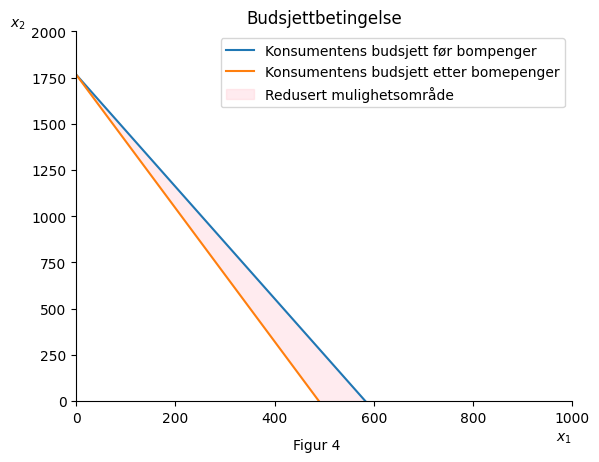

In [9]:

def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

x = np.linspace(0.001,1000,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set_xlim(0,1000)
                ax.set_ylim(0,2000)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett før bompenger')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bomepenger')

ax.fill_between(x, budsjett(1766, 3.03, 1, x), budsjett(1766, 3.61, 1, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

ax.set_title('Budsjettbetingelse')
ax.legend(loc = 'best')
txt = 'Figur 4'
fig.text(.5, .01, txt, ha='center');


Ved å bruke estimatene har jeg i figur 3 tegnet en budsjettbetingelse. Budsjettlinjene viser hvilke begrensninger konsumenten står ovenfor når han skal velge mellom antall km kjøring og andre goder. Budsjettlinjens skjæring med x1 aksen markerer hvor mye konsumenten maksimalt har råd til visst han bruker hele sitt budsjett på godet, tilsvarende gjelder for skjæringen med x2. Vi kan finne skjæringen ved x1 aksen ved å sette å sette x2 = 0. 

\begin{equation}
   P_1x_1 + p_20 = m \rightarrow m = p_1x_1  \rightarrow x_1 = m/p_1
\end{equation}

Konsumenten sitt mulighetsområde består av alle kombinasjoner av x1 og x2 som ligger innenfor eller på budsjettlinjen. Punkter utenfor er ikke oppnåelig for konsumenten. Figur 3 viser budsjettet til en bilist før og etter bompenger. Vi observerer et skifte i budsjettlinjen, der konsumenten sitt mulighetsområde reduseres som følge av den økte kostnaden ved bil kjøring. Det reduserte mulighetsområdet vises som det rosa området. Budsjettlinjen får en ny helning, og blir brattere. Skjæringspunktet med x1 aksen forflyttes til venstre og brøken blir mindre. Virkningen av de økte kostnadene i konsum av gode 1 er at kjøpekaften blir redusert. Dette kommer oppgaven tilbake til senere. 

In [10]:
# symboler
x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
U

# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_ind_sol

# gjør om for å plotte

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

# Løs likning (14)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]

# sett inn i m og løs for x_1

budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]

# dette er likevektsløsning for x_1
#sett inn i x_2_rel for å få x_2_eq

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

In [11]:
# steg 1 har vi løst x_1_eq og x_2_eq

# steg 2
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
in_dict = {"a":0.035,"b":0.965,"m":1766,"p_1":3.03,"p_2":1}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_1_num=sp.sympify(x_1_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_2_num=sp.sympify(x_2_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})

# steg 3 
# vi har laget x_2_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_x_2(U_0,a,b,x_1)

# Ta a=.4, b=.25, m=2000, p_1=25, p_2=40

# finn verdien for U_max, x_1_eq og x_2_eq


nytte = U_max.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.03),(p_2,1)])
x_1_num = x_1_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.03),(p_2,1)])
x_2_num = x_2_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.03),(p_2,1)])

nytte2 = U_max.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])
x_1_num2 = x_1_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])
x_2_num2 = x_2_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])

display(nytte)
display(x_1_num)
display(x_2_num)

display(nytte2)
display(x_1_num2)
display(x_2_num2)

1375.52753991591

28.5590759075908

1679.46600000000

1363.77311886464

23.9706371191136

1679.46600000000

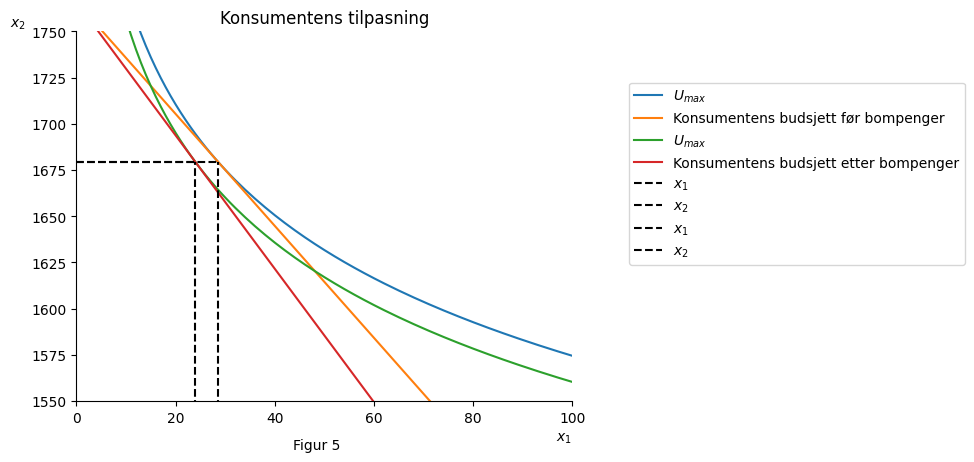

In [12]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# før bompenger
ax.plot(x, indiff_x_2(nytte,0.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett før bompenger')

# etter bompenger
ax.plot(x, indiff_x_2(nytte2,0.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bompenger')

# tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label='$x_2$')

ax.vlines(x_1_num2,0,x_2_num2, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num2,0,x_1_num2, color='black',ls='dashed', label='$x_2$')

# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.1,0.35));

plt.ylim(1550,1750)
plt.xlim(0,100)
txt = 'Figur 5'
fig.text(.5,.01, txt, ha='center');

##### Cobb-Douglas modellen

For å konstruere en Cobb-Douglas-modell trenger vi verdier for kostnad, budsjett og nyttepreferanse. Estimater for kostnad og budsjett har vi allerede funnet i budsjettbetingelsen. Nyttepreferanse er det derimot ikke mulig å beregne et estimat på, oppgaven har derfor valgt verdier som tegner et realistisk bilde av virkeligheten. For å oppnå dette har jeg brukt verdier på nytte som passer med det vi allerede vet om bilister i Tromsø. SSB oppgir at en gjennomsnittlig bilist i Tromsø kjører 10 479 km i året, dette blir tilnærmet 28 km for dagen. Ved å oppgi en nyttepreferanse som er lik 0,049 på gode x1 og 0,951 på x2, finner vi at konsumenten tilpasser seg å kjører tilnærmet nøyaktig på 28 km for dagen. 

Det er flere forhold som påvirker etterspørsel, der en av de viktigste faktorene er prisen. Når prisen øker vil etterspørselen vanligvis synke. Det er dette vi ser av figur 4. Før innføringen av bompenger kjørte konsumenten 28 kilometer, og brukte 1679 kroner på andre goder. Når bompengene innføres tilpasser konsumenten seg å kjører 24 kilometer, mens den bruker like mye som før på andre goder. Konsumenten etterspør mindre kilometer kjøring, noe som i denne modellen tilsvarer en reduksjon på ca 14,3%. Konsumenten befinner seg nå på en ny indifferenskurve som har et lavere nyttenivå. 

Her observerer vi at endringen i prisen på gode 1 (pris per kilometer) ikke påvirker forbruket av gode 2 (andre goder). Dette indikerer en uavhengighet mellom godene når det gjelder konsum. Når prisen på kjøring øker, reduseres ikke konsumet av andre goder. Dette er spesielt for Cobb-Douglas-funksjoner, da det ikke er noen krysspriselastisitet, og er en svakhet ved modellen. På den andre siden er det ikke nødvendigvis slik at konsumenten reduserer konsumet av andre gode. Andre goder kan være mer nødvendig, og er en god grunn til å velge en C-B modell. 

Elastisiteten til etterspørselen etter kjørelengde er på kort sikt spesielt avhengig av substitusjonsmulighetene i markedet, det vil si hvor lett det er å bytte ut personbiltransport med andre transportmidler, som for eksempel kollektivtransport. Det er også avhengig av hvor stor andel av budsjettet som brukes på konsum av godet. Jo større andel av budsjettet, desto mer elastisk er etterspørselen. På sikt vil det være enklere for konsumenten å tilpasse seg de økte kostnadene, og det er dermed interessant om trafikken kan reduseres ytterligere. 

Siden etterspørselen etter et antall km kjøring faller, er det naturlig at etterpørselen etter alterntive goder øke (alt annet likt). Dette skjer på grunn av at det alternative goder nå er blitt relativt billigere, og kalles for substitusjonseffekten. Prisøkningen påvirker også konsumentens kjøpekraft, og oppsumeres i inntektseffekten. I figur 5 er disse effektene illustrert grafisk. 


24.1772411045329

1693.94139200781

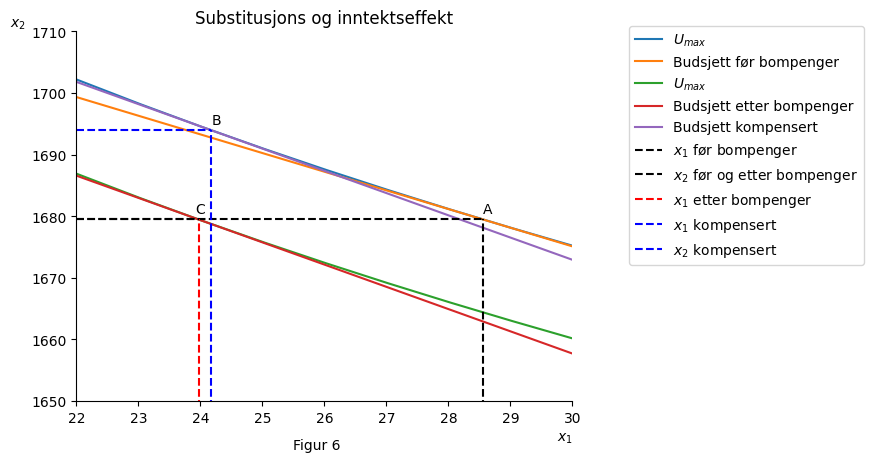

In [13]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# før bompenger
ax.plot(x, indiff_x_2(nytte,.049,.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Budsjett før bompenger')

# etter bompenger
ax.plot(x, indiff_x_2(nytte2,.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Budsjett etter bompenger')


# forskyvning av budsjett
komp = nytte/nytte2
nyttbudsjett = 1766*komp

ax.plot(x, budsjett(nyttbudsjett, 3.61, 1, x), label = 'Budsjett kompensert')

x_1_num_komp = x_1_eq.subs([(a,0.049),(b,0.951),(m,nyttbudsjett),(p_1,3.61),(p_2,1)])
x_2_num_komp = x_2_eq.subs([(a,0.049),(b,0.951),(m,nyttbudsjett),(p_1,3.61),(p_2,1)])


# tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$ før bompenger')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label= '$x_2$ før og etter bompenger' )

ax.vlines(x_1_num2,0,x_2_num2, color='red',ls='dashed', label='$x_1$ etter bompenger')
ax.hlines(x_2_num2,0,x_1_num2, color='black',ls='dashed')

ax.vlines(x_1_num_komp,0,x_2_num_komp, color='blue',ls='dashed', label='$x_1$ kompensert')
ax.hlines(x_2_num_komp,0,x_1_num_komp, color='blue',ls='dashed', label='$x_2$ kompensert')

# tittel
ax.set_title('Substitusjons og inntektseffekt')

# vis navnene:
ax.legend(bbox_to_anchor=(1.1,0.35))

# punkter på graf
ax.annotate('A',xy=(x_1_num,x_2_num+1), size = 10)
ax.annotate('C',xy=(x_1_num2-0.05,x_2_num2+1), size = 10)
ax.annotate('B',xy=(x_1_num_komp,x_2_num_komp+1), size = 10)

plt.ylim(1650,1710)
plt.xlim(22,30)
txt = 'Figur 6'
fig.text(.5, .01, txt, ha='center');

display(x_1_num_komp)
display(x_2_num_komp)

\begin{equation}
   A \rightarrow B = substitusjonseffekten
\end{equation}

\begin{equation}
B \rightarrow C =  inntektseffekten 
\end{equation}

\begin{equation}
A \rightarrow C =  totaleffekten 
\end{equation}

En økning i inntekt fører til at budsjettlinjen blir paralellforskjøvet utover i figuren. Vi kan nå undersøke hvordan konsumenten vil tilpasse seg dersom den får en kompensasjon, slik at den kan holde seg på samme nyttenivå. 

Bompenger har en substitusjonseffekt på antall km kjøring med en verdi på ca. -4,4, og fremkommer fra bevegelsen fra punkt A til B. Dette indikerer at når prisen på å kjøre øker som følge av bompenger, vil konsumenten ved kompensert inntekt redusere etterspørselen med 4.4 km, og i stedet velge alternative transportformer eller kjøre færre turer. Inntektseffekten fremkommer av bevegelsen fra punkt B til C. I modellen ser vi at konsumenten havner i et punkt som ligger nærmere origo, og får dermed redusert sin nytte. Effekten innebærer også en reduksjon i etterspørselen av kjøring, som betyr at antall km kjøring er et normalt gode, og at etterspørselen faller dersom prisen øker. Totaleffekten på etterspørselen av antall km kjøring er gitt som beveglsen fra A til C, og har en verdi på 4,6, som betyr at konsumenten kjører 4,6 km mindre når bompengene innføres. 

Bompenger har en subsitusjonseffekt på andre goder med en verdi på 14,4. Dette betyr at når konsumenten blir kompensert vil den etterspørre 14,4 mer av andre goder. Inntektseffeketen har en verdi på 14.4, som indikerer at konsumenten øker etterspørselen etter andre goder dersom den blir kompensert for økt pris av kjøring. Totaleffekten er null, og henger sammen med C-B funksjonen. 

In [14]:
subtitusjonseffekten  = x_1_num- x_1_num_komp

subtitusjonseffekten_x2 = x_2_num- x_2_num_komp

inntektseffekten = x_1_num_komp-x_1_num2

inntektseffekten_x2 = x_2_num_komp -x_2_num2

totaleffekten = x_1_num-x_1_num2

totaleffekten_x2 = x_2_num-x_2_num2

In [15]:
u = x_1**0.049*x_2**0.951

msb = sp.diff(u, x_1)/sp.diff(u,x_2)

prisforhold = p_1/p_2

msb_prisforhold = sp.Eq(msb,prisforhold)

# Bruker prisforholdet til å gjøre noen mellom regninger for hånd her. 

# Finner at etterspørselen etter gode 1 er gitt ved funksjonen: 

def etterspørsel_x1(m,p_1):
    return 0.0489*m/p_1

# Finner etterspørselen etter gode 2 og prøver å gjøre om til prisform, men klarer ikke plotte med pris på y-aksen likevel. 

eq = sp.Eq(x_2*p_2,m/1.0515)

eq_sol_p2 = sp.solve(eq,p_2)

eq_sol_p2

def etterspørsel_p2(m,x_2):
    return 0.951022349025202*(m/x_2)

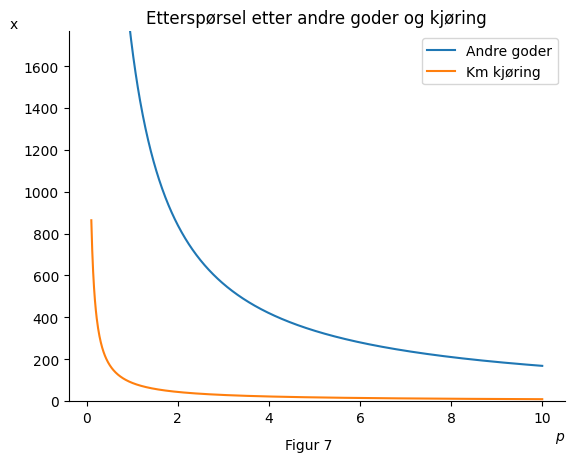

In [16]:
fig, ax = plt.subplots()
ax.set_ylabel('x', loc='top', rotation=0)
ax.set_xlabel('$p$', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylim(0,1766)
ax.set_title('Etterspørsel etter andre goder og kjøring')

z = np.linspace(0.1,10,1000)

ax.plot(z,etterspørsel_p2(1766,z), label = 'Andre goder')
ax.plot(z,etterspørsel_x1(1766,z), label = 'Km kjøring')
ax.legend(loc = 'best')
txt = 'Figur 7'
fig.text(.5, .01, txt, ha='center');

Etterspørselsfunksjonene i figur 7 viser etterspørselen etter andre goder og etterspørselen etter kilometer kjøring. Ved å sammenligne kurvene for de to etterspørselsfunksjonene, kan det observeres at etterspørselskurven for kilometer kjøring er brattere enn etterspørselskurven for andre goder.

Den brattere etterspørselskurven for kilometer kjøring indikerer en høyere grad av følsomhet for endringer i prisen på kjøring. Dette henger sammen med konsuments nyttepreferanse. Når prisen øker, er konsumenten mer villige til å redusere antall kjørte kilometer i større grad enn den er villige til å redusere forbruket av andre goder. Dette antyder en høy grad av substitusjonsevne i responsen på prisendringer i kjøring. I figur 8 er etterspørselen etter kjøring forstørret. 

Forskjellen i kurvenes bratthet kan skyldes flere faktorer, f.eks. at kilometer kjøring er mer fleksibelt i form av alternativer tilgjengelig for konsumenten. Samtidig kan andre goder være mer nødvendig eller ha færre alternativer, noe som begrenser konsuments evne til å redusere sitt forbruk selv ved prisendringer.

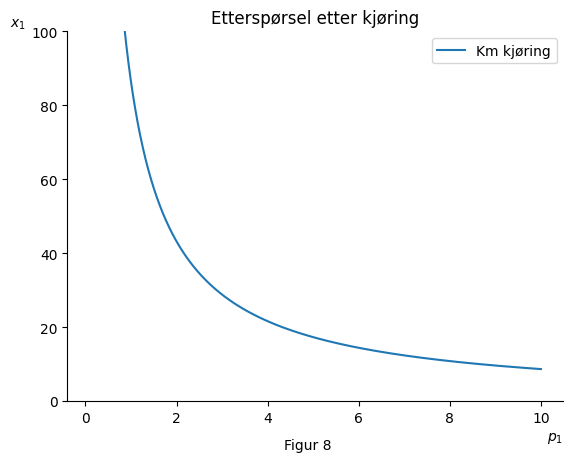

In [17]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_1$', loc='top', rotation=0)
ax.set_xlabel('$p_1$', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylim(0,100)
ax.set_title('Etterspørsel etter kjøring')

ax.plot(z,etterspørsel_x1(1766,z), label = 'Km kjøring')

ax.legend(loc = 'best')
txt = 'Figur 8'
fig.text(.5, .01, txt, ha='center');

### Kapittel 4. Konklusjon 

I denne oppgaven har jeg utforsket effekten bompenger har på bilister ved hjelp av en Cobb-Douglas-modell. Jeg har også analysert etterspørselen etter kjøring og andre goder. I kapittel 2 så man at trafikkmengden er blitt redusert etter innføringen av bompenger. Samtidig så man at antall påstigende på buss, og antall syklister økte sammenlignet med tilsvarende måneder fra 2022. I kapittel 3 ble det påvist at en gjennomsnittlig bilist tilpasser seg og kjører 24 km per dag, som er 4,6 km mindre enn før bompengene ble innført. 

Det er blitt observert at prisen er en viktig faktor som påvirker etterspørselen. Når prisen på kjøring øker, reduseres etterspørselen, mens forbruket av andre goder forblir uendret. Dette indikerer en uavhengighet mellom godene når det gjelder konsum, som er en svakhet ved Cobb-Douglas-modellen.

Jeg har også sammenlignet etterspørselskurvene for antall km kjøring og andre goder, og sett at etterspørselskurven for kjøring er brattere, noe som tyder på en høyere grad av følsomhet for prisendringer. Dette kan skyldes at kjøring har flere alternativer og større substitusjonsmuligheter for konsumenten sammenlignet med andre goder. Forskjellen i kurvenes bratthet kan også skyldes at andre goder er mer nødvendige eller har færre alternativer, noe som begrenser konsuments evne til å redusere forbruket selv ved prisendringer.

Samlet sett gir analysen av Cobb-Douglas-modellen og etterspørselen etter kjøring og andre goder et innblikk i konsuments respons på prisendringer. Det kan være nyttig for beslutningstakere å forstå disse forskjellene for å kunne utforme effektive og målrettede tiltak som tar hensyn til hvordan pris påvirker etterspørsel og konsum.


Lenker:

Github repository : 
https://github.com/loopdiggaz/SOK1006

Pyhton fil med kode: 
https://github.com/loopdiggaz/SOK1006/blob/main/Mappe2/mappeoppgave2_61.ipynb

Oppdatert PDF utgave av mappe 1: 
https://github.com/loopdiggaz/SOK1006/blob/main/Mappe1/mappeoppgave_61.pdf



##### Kildeliste

Andreassen, Viggo., Bredesen, Ivar., Thøgersen, Joachim (2021). Innføring i Mikroøkonomi. For økonomisk-administrative stuider (3.utg). Cappelen Damm.

Hansen, Robert G. (2013). «Mikroinnføring – en kort innføring». 1. Utgave, 1. opplag 2013. Gyldendal.

Bompengeselskap Nord. Bypakken Tenk Tromsø. Hentet fra: https://bpsnord.no/bypakke-tenk-tromso/

Sand, Øystein., Johansen, Bjørn Gjerde., Halse, Askill., Sæther Svein (2022). Road Tolls in Norway, 2005-2021. The Norwegian Public Roads Administration. https://www.toi.no/getfile.php?mmfileid=73593

Steinsland, Christian., Madslien, Anne., Johansen, Kjell., Wangsness, Paal B. (2022). Konseptvalgutredning veibruksavgift og bompenger, vedlegg 6-Transportmodellberegninger. Transportøkonomisk institutt (TØI). https://www.toi.no/getfile.php?mmfileid=74283

Nordlys (2023). «Bompenge-snittet økte i mars – De viktigste tallene går ned» av Torje Dønnestad Johansen. Publisert 26.04.2023. hentet fra: https://www.nordlys.no/bompenge-snittet-okte-i-mars-de-viktigste-tallene-gar-ned/s/5-34-1776123

SSB(2023). Lønn. Oppdatert 02.02.2023. Hentet fra: https://www.ssb.no/arbeid-og-lonn/lonn-og-arbeidskraftkostnader/statistikk/lonn

SSB(2023). Kjørelengder. Oppdatert 27.03.2023. Hentet fra: https://www.ssb.no/transport-og-reiseliv/landtransport/statistikk/kjorelengder

SOK- 1006-1 23V Mikroøkonomi: Økonomisk atferd, markeder og priser. «Notater forelesning 13» Av Derek J. Clark. 

SOK- 1006-1 23V Mikroøkonomi: Økonomisk atferd, markeder og priser. «Notater forelesning 14» Av Derek J. Clark. 
